Cuantificación de una señal análoga

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Generación de la señal análoga

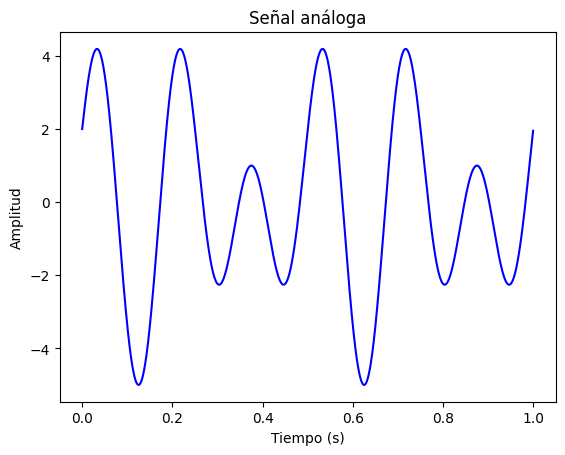

In [23]:
Ts = 1.0/24.0
t=np.arange(0.0,1.0,Ts/100.0)
f1 = 4 #Hz
f2 = 6 #Hz
xt = 2*np.cos(2*np.pi*f1*t) + 3*np.sin(2*np.pi*f2*t)
#Adicion ruido aleatorio
# c_noise = np.random.rand(len(t))
# xt = xt + 0.5*c_noise
plt.figure(1)
plt.plot(t, xt, color = 'blue') 
plt.title("Señal análoga") 
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud") 
plt.show()

Discretización de la señal análoga. En rojo la señal análoga, en azul las muestras capturadas.

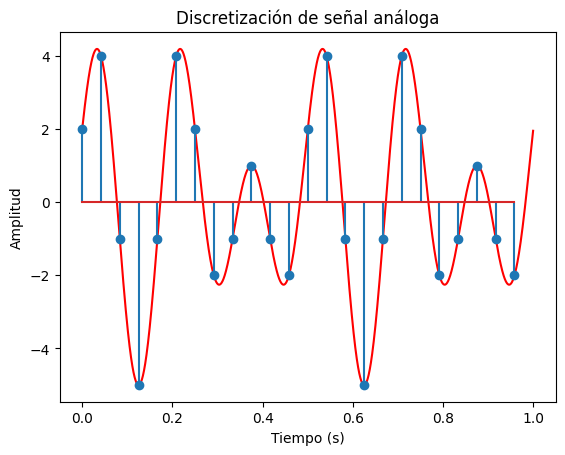

In [24]:
samples = np.arange(0.0,1.0,Ts)
n = range(0,len(t),100)
nTs = t[n]
xnTs = xt[n]
plt.figure(2)
plt.plot(t, xt, color = 'red') 
plt.stem(nTs,xnTs) 
plt.title("Discretización de señal análoga") 
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud") 
plt.show()

Cuantificación de la señal discretizada.

1. se define el rango de la señal (valores máxmio y mínimo)
2. se define el número de bits para cuantificar (resolución)
3. se determina el número de niveles de cuatificación
4. se determina la altura del escalón de cuantificaión

In [25]:
ran = max(xt)-min(xt); #rango de la señal
nbits = 8 # numero bits de cuantificacion
nnivs = (np.power(2,nbits))-1 #numero de niveles de cuantificacion
delta = ran/nnivs #altura de nivel de cuantificacion

Con los datos anteriores se procede a calcular los valores de cada escalon de cuantificación

In [26]:
nive = np.arange(min(xt),max(xt),delta)

Se calcula el valor que está en medio de cada escalón de cuantificación, esto se hace para realizar el cálculo de la cuantificación por redondeo

In [27]:
nivem = nive + (delta/2.0)

Cuantificacón de la señal teniendo en cuenta los niveles calculados; los valores cuantificados quedan guardados en el arreglo xnq
El ciclo for realizará el cálculo  por cada muestra de la señal
El ciclo while busca el nivel de cuantificación correspondiente

In [28]:
N = len(nTs)
xnq = np.zeros(N)
for i in range(0,N):
    j = 0
    while xnTs[i] > nivem[j]:
        j = j+1
    xnq[i] = nive[j]


Gráfica con las señales sin cuantificar y cuantificada. Las gráficas están superpuestas y no es apreciable la diferencia. Al disminuir el número de bits (nbits) se podrá notar la diferencia

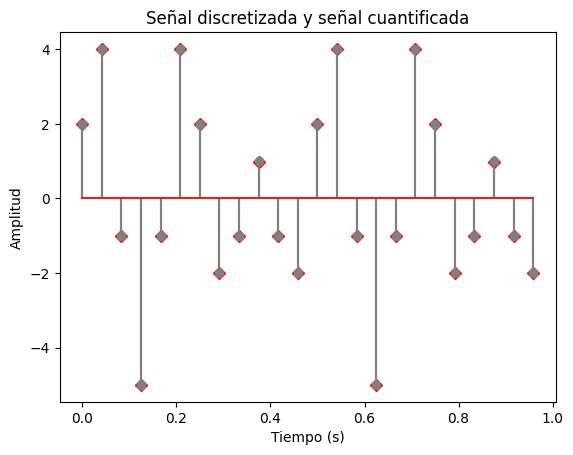

In [29]:
plt.figure(3)
plt.stem(nTs,xnq,linefmt='red',markerfmt='D') #senal cuantificada
plt.stem(nTs,xnTs,linefmt='grey') #señal discretizada sin cuantificar
plt.title("Señal discretizada y señal cuantificada") 
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud") 
plt.show()

Para hacer evidente la diferencia entre los valores antes y después de la cuantificación, se calcula el error de cuantificación y se grafíca.
Observe la magnitud de los valores del error, son muy pequeños en comparación con la amplitud de la señal

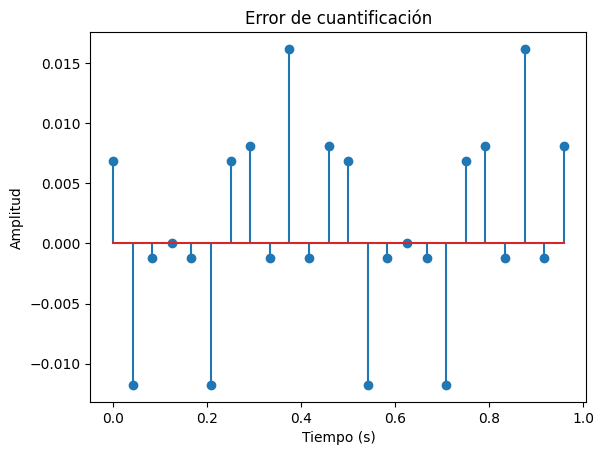

In [30]:
err = xnTs - xnq
plt.figure(4)
#plt.plot(t, xt, color = 'red') 
plt.stem(nTs,err) 
plt.title("Error de cuantificación") 
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud") 
plt.show()

Para entender la naturaleza del ruido (error) de cuantificación se calculan algunas variables estadśiticas como la media y la desviación estandar. De acuerdo con la naturaleza de la señal y las condiciones del proceso de cuantificación, los valores de estas variables se pueden ver afectados

In [31]:
media_err = np.mean(err)
print('Media: ' + str(media_err))
desv_err = np.std(err)
print('Desv. Std.: ' + str(desv_err))

Media: 0.0014701508591205466
Desv. Std.: 0.00787586099917291
